**Statistical Analysis and Data Visualization using Python**

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/thesis-project-data/thesis_project_data.csv")
df.head()

,Label,Name,Age,Gender,Number,S_Id,Research Area,CGPA
0,Thesis,Ayesha Rahman,23,F,1710203021,211902052,Machine Learning,3.85
1,Project,Tanvir Ahmed,22,M,1711223344,211902062,Web Development,3.65
2,Thesis,Sharmin Akter,24,F,1712234455,211902053,Computer Vision,3.90
3,Thesis,Mahmudul Hasan,23,M,1714236677,211902054,Natural Language Processing,3.95
4,Project,Saiful Islam,21,M,1713235566,211902063,Mobile App Development,3.70


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


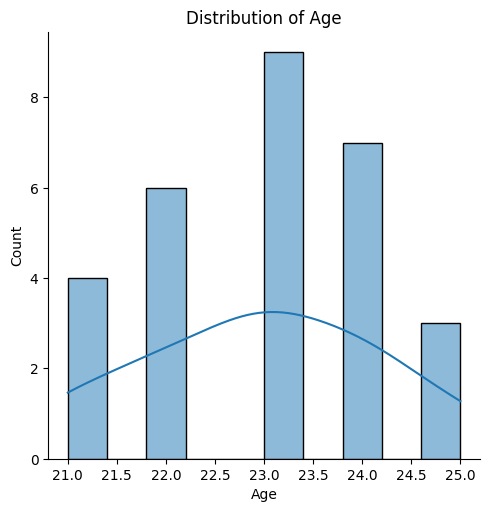

In [3]:
sns.displot(df['Age'], bins=10, kde=True,rug=False)
plt.title('Distribution of Age')
plt.show()

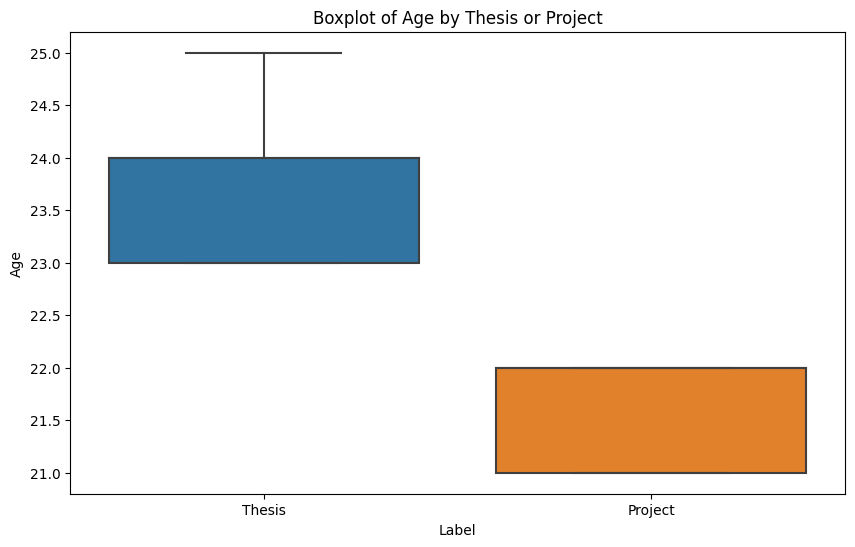

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.boxplot(x="Label", y="Age", data=df)
plt.title('Boxplot of Age by Thesis or Project')
plt.show()

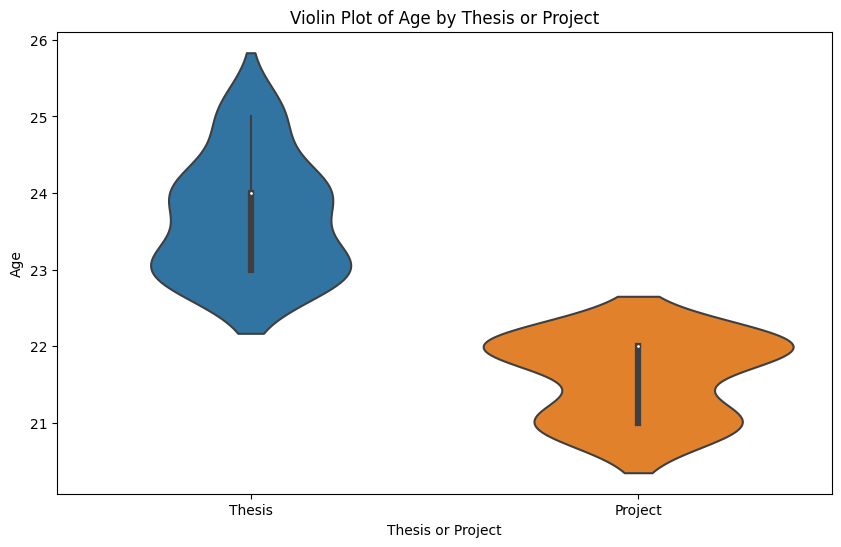

In [5]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Label', y='Age', data=df)
plt.title('Violin Plot of Age by Thesis or Project')
plt.xlabel('Thesis or Project')
plt.ylabel('Age')
plt.show()

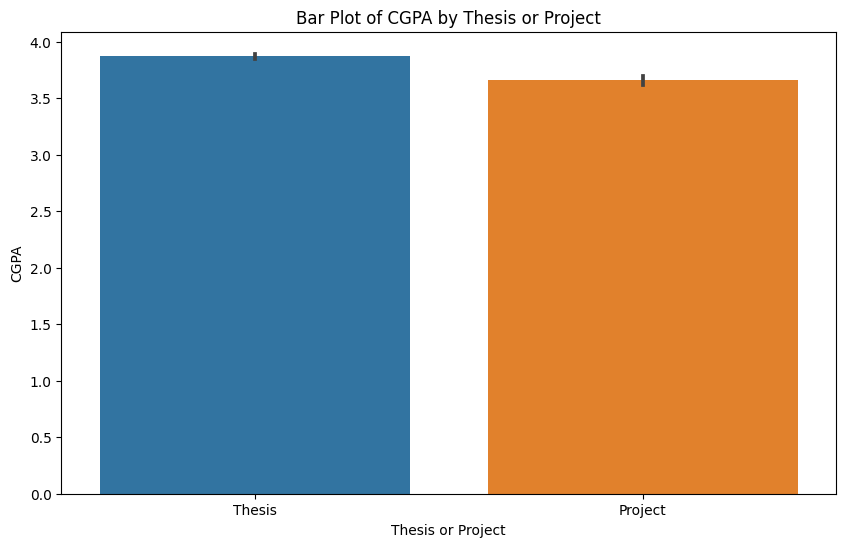

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Label', y='CGPA', data=df)
plt.title('Bar Plot of CGPA by Thesis or Project')
plt.xlabel('Thesis or Project')
plt.ylabel('CGPA')
plt.show()

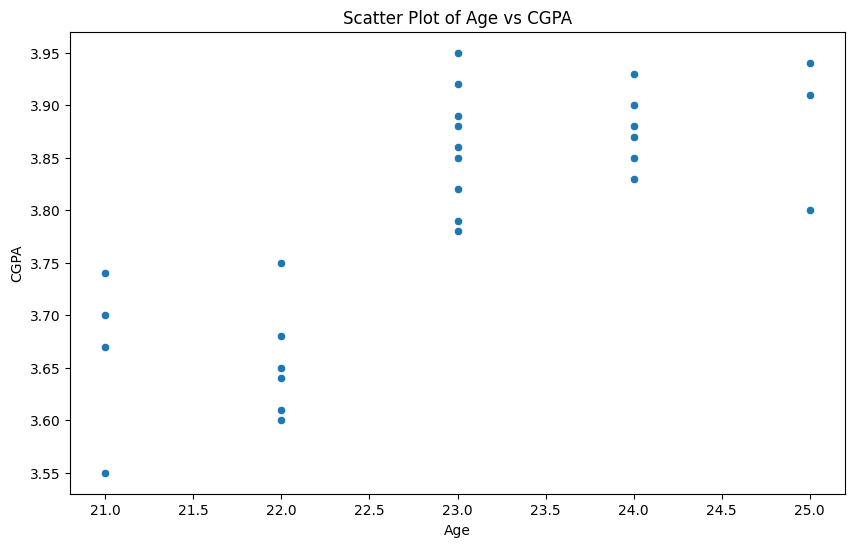

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Age", y="CGPA", data=df)
plt.title('Scatter Plot of Age vs CGPA')
plt.xlabel('Age')
plt.ylabel('CGPA')
plt.show()

<Figure size 1000x600 with 0 Axes>

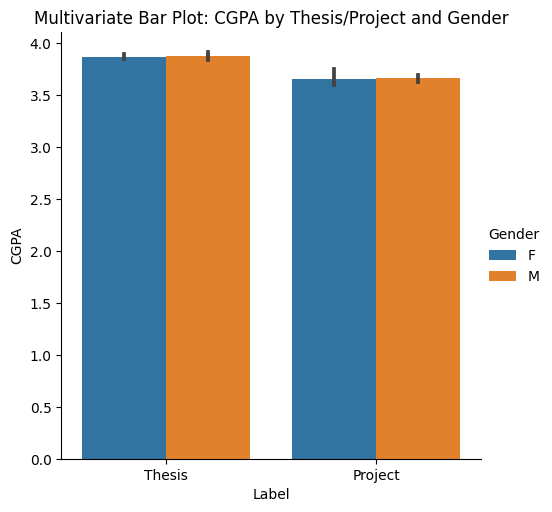

In [8]:
plt.figure(figsize=(10, 6))
sns.catplot(x="Label", y="CGPA", hue="Gender", kind="bar", data=df)
plt.title('Multivariate Bar Plot: CGPA by Thesis/Project and Gender')
plt.show()

In [9]:
print("Pearson between Age and CGPA:", df['Age'].corr(df['CGPA']))
print("Spearman between Age and CGPA:", df['Age'].corr(df['CGPA'], method='spearman'))

Pearson between Age and CGPA: 0.7667468622007548
Spearman between Age and CGPA: 0.7532124046718363


Index(['Age', 'CGPA', 'Gender_M', 'Label_Thesis'], dtype='object')


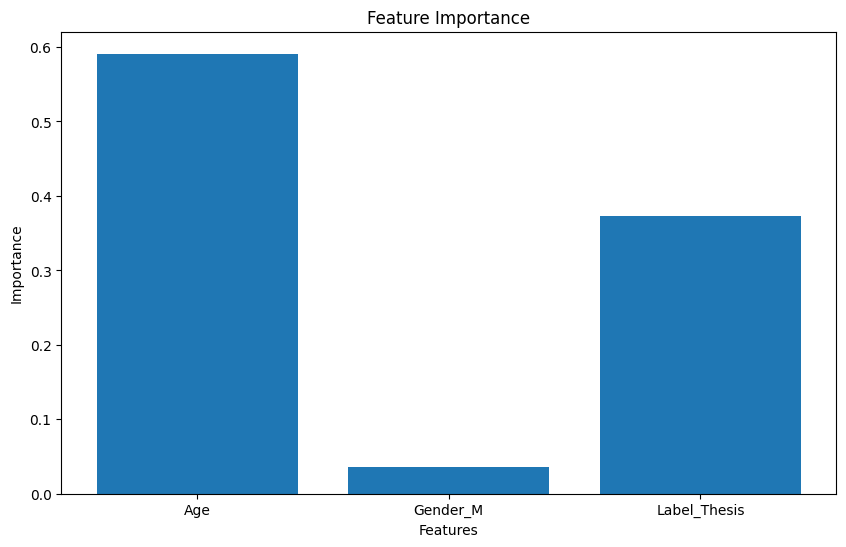

In [10]:
from sklearn.ensemble import RandomForestRegressor

df_encoded = pd.get_dummies(df[['Age', 'Gender', 'CGPA', 'Label']], drop_first=True)

print(df_encoded.columns)

X = df_encoded[['Age', 'Gender_M', 'Label_Thesis']] 
y = df_encoded['CGPA']

model = RandomForestRegressor()
model.fit(X, y)

importance = model.feature_importances_
features = ['Age', 'Gender_M', 'Label_Thesis'] 

plt.figure(figsize=(10, 6))
plt.bar(features, importance)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()